# New Car Project

## SOMMAIRE
1. Libraries Import

2. Dataset Import & Data Exploration

3. Simple linear regression

- Linear Train and Test Dataset Creation

- Model 1 : scipy => stats => linregress
- Model 2 : numpy => polyfit
- Model 3 : scikit learn => LinearRegression
- Model 4 : statsmodel => OLS (moindres carrés = Ordinary Least Squares)

- Simple linear regression models comparison

4. Multivariate linear regression

- CONCLUSION

5. Custom Model
- Création du modèle personnalisé
- Performance du modèle personnalisé

6. Quel prix pour un véhicule de moins de 7 ans, moins de 100 000 km avec boîte manuelle ?

## Libraries Import

In [1]:
# Global
import math

#Data import & Exploring
import pandas as pd
import missingno as msno

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Analysis
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score

## Dataset Import

In [2]:
car_data = pd.read_csv('carData.csv', sep = ',')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data Exploration

In [3]:
#type(car_data.Car_Name[0])

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
car_data.isna()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Analyse données manquantes')

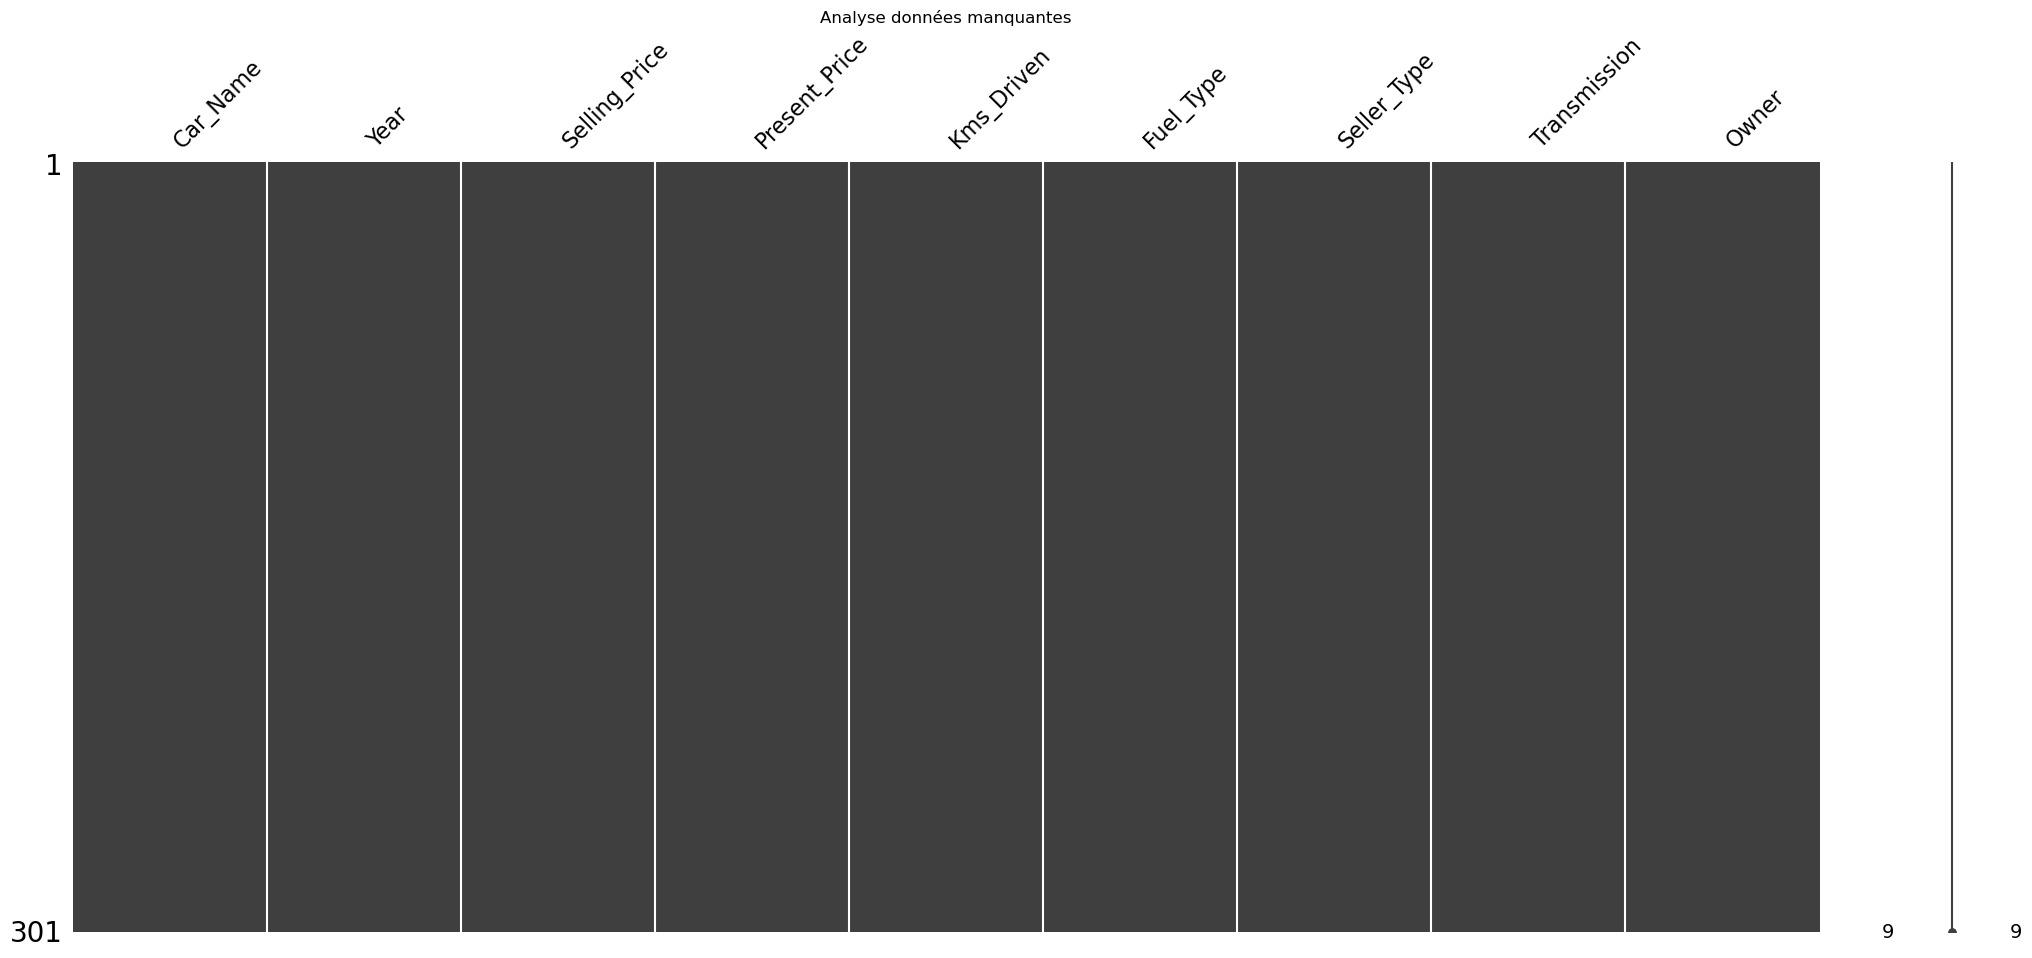

In [7]:
msno.matrix(car_data)
plt.title('Analyse données manquantes')

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>,
        <AxesSubplot:title={'center':'Present_Price'}>],
       [<AxesSubplot:title={'center':'Kms_Driven'}>,
        <AxesSubplot:title={'center':'Owner'}>, <AxesSubplot:>]],
      dtype=object)

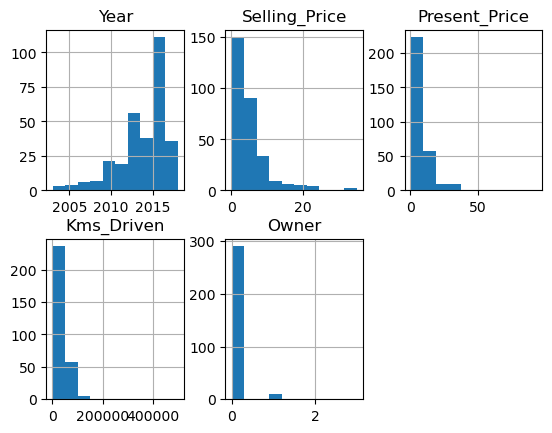

In [8]:
car_data.hist(layout=(2, 3))

Text(0, 0.5, 'Nombre de véhicules')

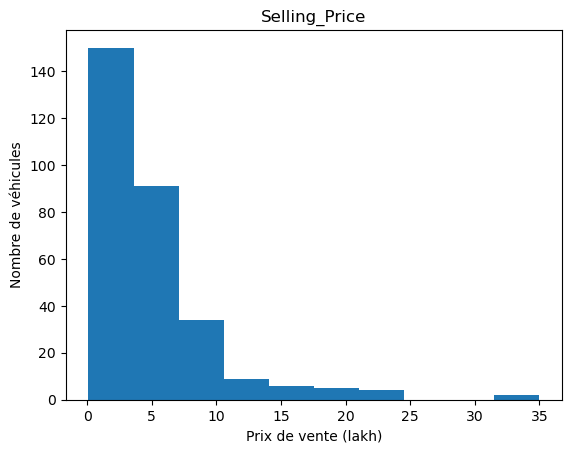

In [9]:
car_data.hist(column='Selling_Price', grid=False)

plt.xlabel('Prix de vente (lakh)')

plt.ylabel('Nombre de véhicules')

Text(0, 0.5, 'Nombre de véhicules')

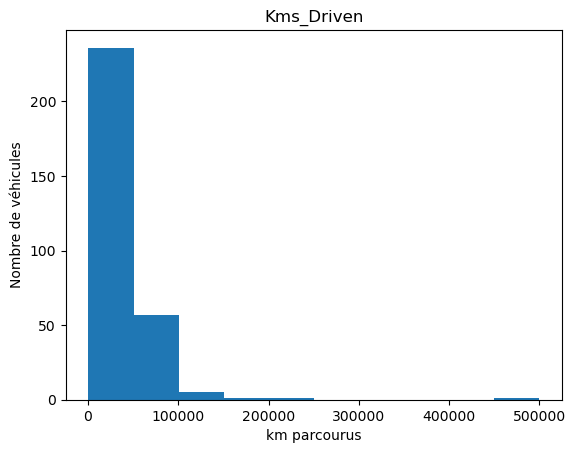

In [10]:
car_data.hist(column='Kms_Driven', grid=False)

plt.xlabel('km parcourus')

plt.ylabel('Nombre de véhicules')

Text(0, 0.5, 'Nombre de véhicules')

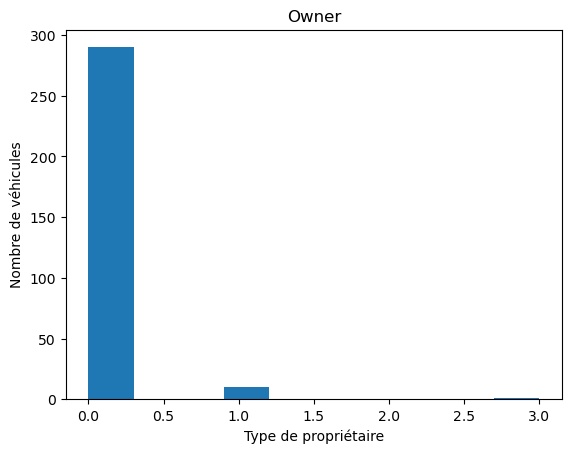

In [11]:
car_data.hist(column='Owner', grid=False)

plt.xlabel('Type de propriétaire')

plt.ylabel('Nombre de véhicules')

Text(0.5, 1.0, 'Histogramme du prix de vente (lakh) en fonction des km parcourus')

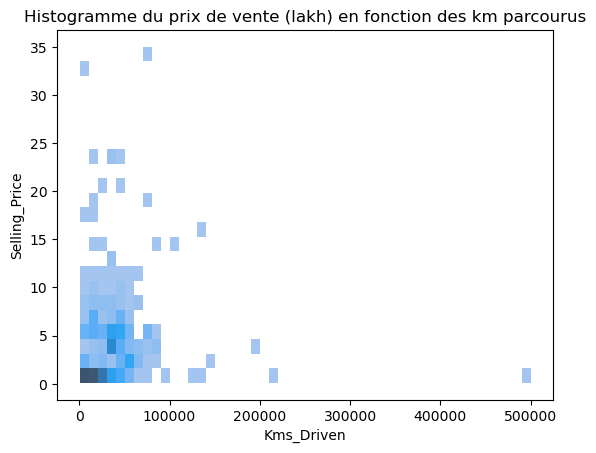

In [12]:
sns.histplot(data=car_data, x='Kms_Driven', y='Selling_Price')
plt.title('Histogramme du prix de vente (lakh) en fonction des km parcourus')

In [13]:
#car_data[car_data["Kms_Driven"]>300000]

In [14]:
#car_data[car_data["Selling_Price"]>25]

Text(0.5, 1.0, 'Prix de vente (lakh) en fonction des types de propriétaire')

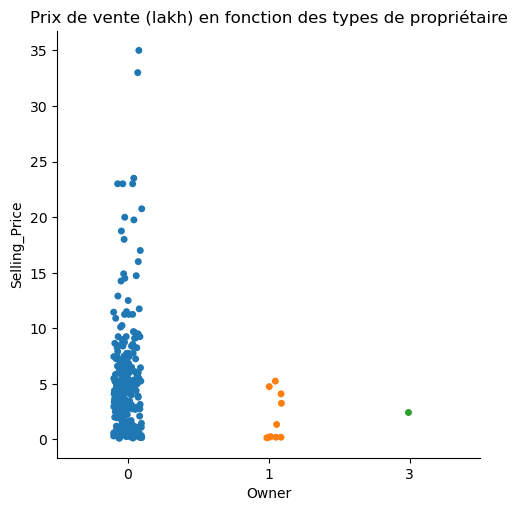

In [15]:
sns.catplot(data=car_data, x='Owner', y='Selling_Price')
plt.title('Prix de vente (lakh) en fonction des types de propriétaire')

#PERTINENT SI LES DONNEES SONT QUALITATIVES

In [16]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Text(0.5, 1.0, 'Répartition des années de construction')

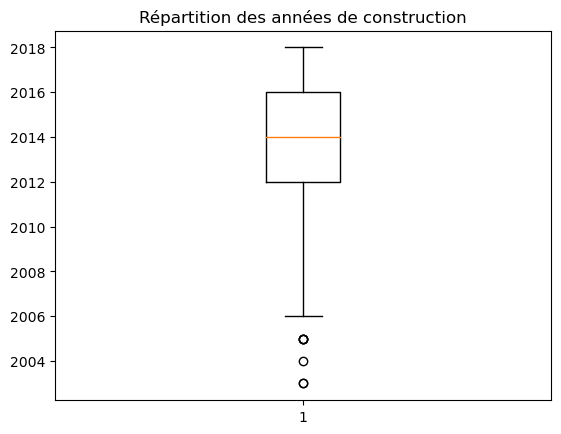

In [17]:
plt.boxplot(data=car_data, x='Year')
plt.title('Répartition des années de construction')

In [18]:
#car_data[car_data["Owner"]==3]

In [19]:
#car_data.drop(car_data[car_data["Owner"]==3].index, inplace = True)

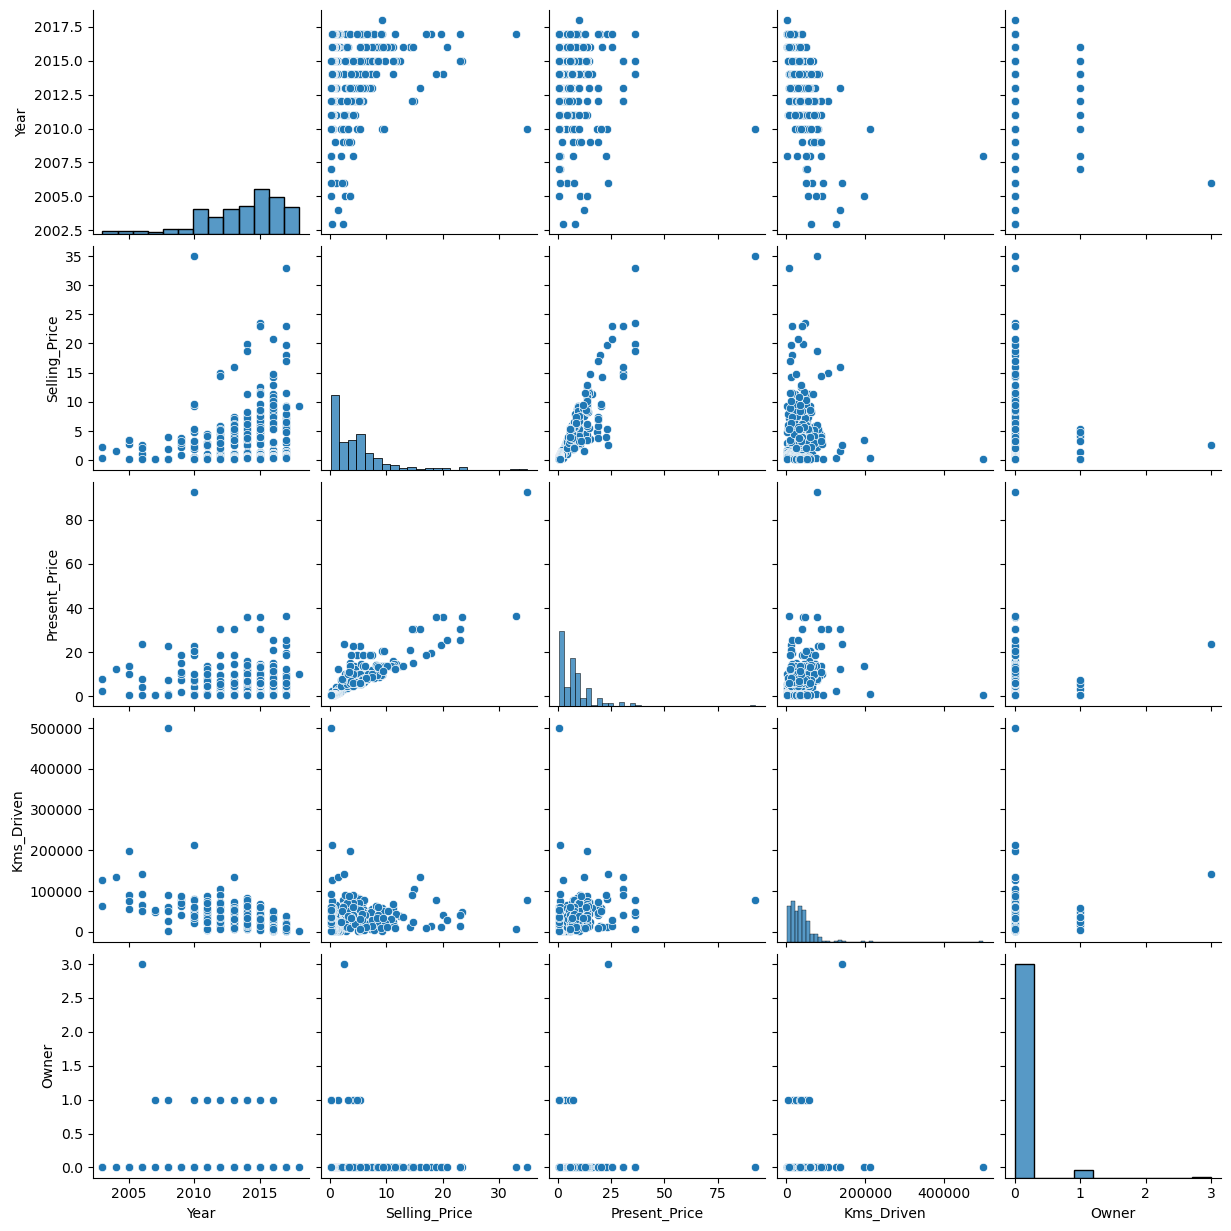

In [20]:
sns.pairplot(car_data)

Text(0.5, 1.0, 'Matrice de corrélation')

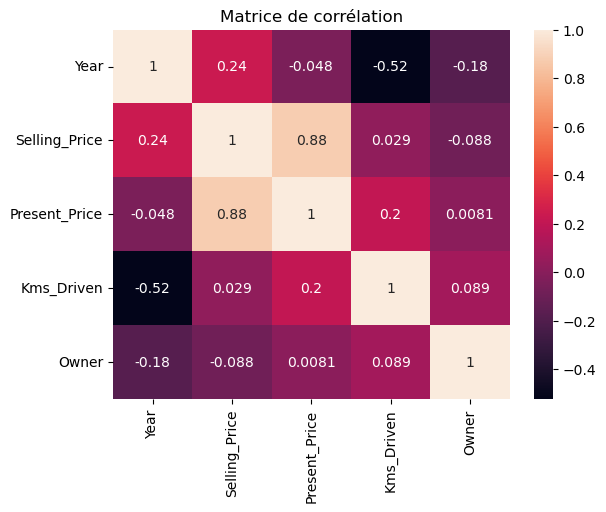

In [21]:
sns.heatmap(car_data.corr(), annot = True)
plt.title('Matrice de corrélation')
#RELATION ENTRE AGE ET PRIX DE VENTE FAIBLE => 0,25

# Jeu de données adapté ?

In [22]:
#Elimination des données isolées
car_data.drop(car_data[car_data["Kms_Driven"]>300000].index, inplace = True)
car_data.drop(car_data[car_data["Selling_Price"]>25].index, inplace = True)
car_data.drop(car_data[car_data["Owner"]==3].index, inplace = True)

car_data.reset_index(drop=True, inplace=True)

In [23]:
#car_data[car_data["Owner"]==3]

In [24]:
#car_data

## Dataset Creation, Train and Test

In [25]:
# Sélection de la variable explicative (calcul de l'âge du véhicule)
X = car_data.Year.max() + 1 - car_data.Year

# Sélection de la variable expliquée (prix du véhicule)
Y = car_data.Selling_Price

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [26]:
# Fonctions globales et métriques

# Predict
def predict(X, a, b):
    
    return a * X + b


# Residual Sum of Squares / Somme résiduelle des carrés
def RSS(Y, Y_pred):
    
    rss = 0
    
    for i in range(len(Y)):
        
        rss = rss + (Y_pred.array[i] - Y.array[i])**2
        
    return rss


# Mean Squared Error / Erreur quadratique moyenne
def MSE(Y, Y_pred):
    
    return RSS(Y, Y_pred) / len(Y)


# Root Mean Squared Error / Racine de l'erreur quadratique moyenne
def RMSE(Y, Y_pred):
    
    return math.sqrt(MSE(Y, Y_pred))


#Root Mean Squared Log Error
def RMSLE (Y, Y_pred):
    
    rmsle = 0
    N = len(Y)
    
    for i in range(N):
        
        rmsle = rmsle + (math.log(Y_pred.array[i] + 1) - math.log(Y.array[i] + 1))**2
        
    rmsle = math.sqrt(rmsle / N)
        
    return rmsle


## Model 1 : scipy => stats => linregress

### Model 1 - Train

In [27]:
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = stats.linregress(X_train, Y_train)

print('slope :', slope_1)
print('intercept :', intercept_1)
r2_1 = r_value_1**2
print('r² :', r2_1)

slope : -0.37010610741296657
intercept : 6.151242354819531
r² : 0.06977041507865692


In [28]:
fit_1 = predict(X_train, slope_1, intercept_1)

In [29]:
#r2 = r2_score(Y_train, fit_1)
#print(r2)

Text(0, 0.5, 'Prix de vente (lakh)')

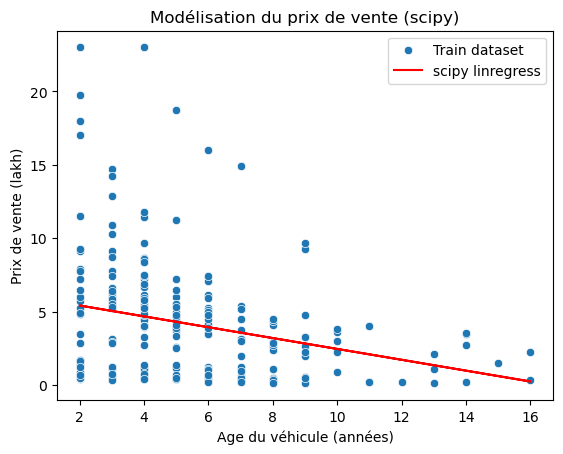

In [30]:
sns.scatterplot(data=car_data, x=X_train, y=Y_train, label='Train dataset')
plt.plot(X_train, fit_1, c='r', label='scipy linregress')
plt.legend()

# Set title
plt.title('Modélisation du prix de vente (scipy)')
# Set x-axis label
plt.xlabel('Age du véhicule (années)')
# Set y-axis label
plt.ylabel('Prix de vente (lakh)')

### Model 1 - Validation

Text(0, 0.5, 'Prix de vente (lakh)')

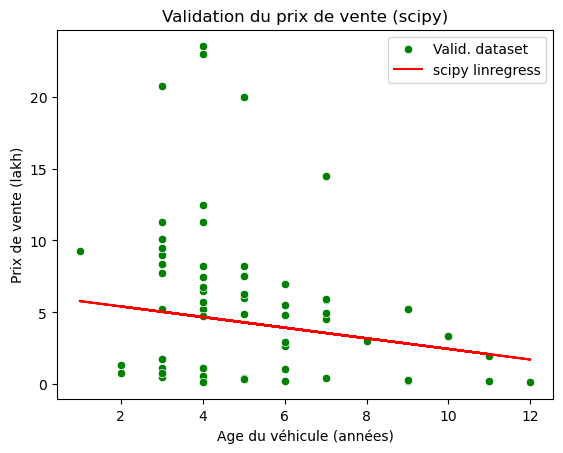

In [31]:
Y_pred_1 = predict(X_valid, slope_1, intercept_1)

sns.scatterplot(data=car_data, x=X_valid, y=Y_valid, color='g', label='Valid. dataset')
plt.plot(X_valid, Y_pred_1, c='r', label='scipy linregress')
plt.legend()

# Set title
plt.title('Validation du prix de vente (scipy)')
# Set x-axis label
plt.xlabel('Age du véhicule (années)')
# Set y-axis label
plt.ylabel('Prix de vente (lakh)')

In [32]:
r2_1V = r2_score(Y_valid, Y_pred_1)

print('r² Validation : ', r2_1V)
print('r² Train : ', r2_1)

r² Validation :  0.0017347437789374531
r² Train :  0.06977041507865692


In [33]:
rss_1V = RSS(Y_valid, Y_pred_1)
mse_1V = MSE(Y_valid, Y_pred_1)
rmse_1V = RMSE(Y_valid, Y_pred_1)
rmsle_1V = RMSLE(Y_valid, Y_pred_1)

print('RSS', rss_1V)
print('MSE', mse_1V)
print('RMSE', rmse_1V)
print('RMLSE', rmsle_1V)

RSS 1889.7355695785616
MSE 31.49559282630936
RMSE 5.612093444189019
RMLSE 0.8377051947379184


## Model 2 : numpy => polyfit

### Model 2 - Train

In [34]:
coeffs_2 = np.polyfit(X_train, Y_train, 1)
slope_2 = coeffs_2[0]
intercept_2 = coeffs_2[1]

print('slope :', slope_2)
print('intercept :', intercept_2)

r2_2 = np.corrcoef(X_train, Y_train)[0, 1]**2

print('r² :', r2_2)

slope : -0.37010610741296734
intercept : 6.1512423548195345
r² : 0.06977041507865694


In [35]:
fit_2 = predict(X_train, slope_2, intercept_2)

In [36]:
#r2_2 = r2_score(Y_train, fit_2)
#print(r2_2)

Text(0, 0.5, 'Prix de vente (lakh)')

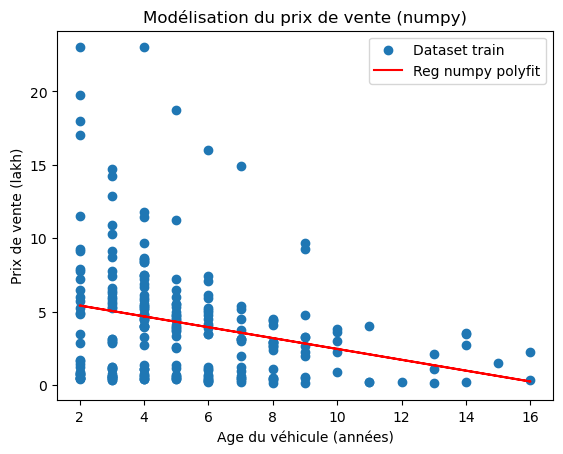

In [37]:
plt.scatter(X_train, Y_train, label='Dataset train')
plt.plot(X_train, fit_2, c='red', label='Reg numpy polyfit')
plt.legend()

# Set title
plt.title('Modélisation du prix de vente (numpy)')
# Set x-axis label
plt.xlabel('Age du véhicule (années)')
# Set y-axis label
plt.ylabel('Prix de vente (lakh)')

### Model 2 - Validation

Text(0, 0.5, 'Prix de vente (lakh)')

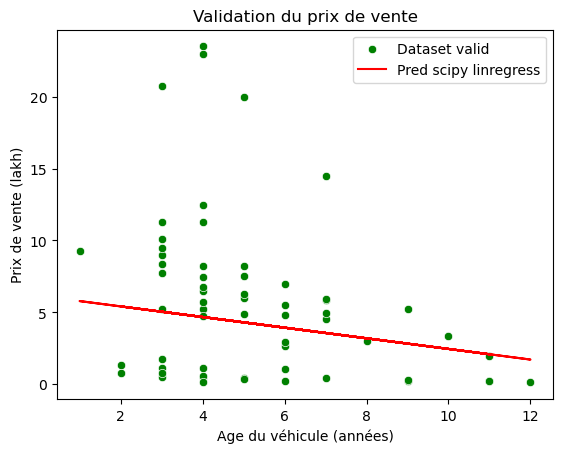

In [38]:
Y_pred_2 = predict(X_valid, slope_2, intercept_2)

sns.scatterplot(data=car_data, x=X_valid, y=Y_valid, color='g', label='Dataset valid')
plt.plot(X_valid, Y_pred_2, c='r', label='Pred scipy linregress')
plt.legend()

# Set title
plt.title('Validation du prix de vente')
# Set x-axis label
plt.xlabel('Age du véhicule (années)')
# Set y-axis label
plt.ylabel('Prix de vente (lakh)')

In [39]:
r2_2V = np.corrcoef(Y_valid, Y_pred_2)[0, 1]**2

print('r² Validation : ', r2_2V)
print('r² Train : ', r2_2)

r² Validation :  0.09678949113614978
r² Train :  0.06977041507865694


In [40]:
rss_2V = RSS(Y_valid, Y_pred_2)
mse_2V = MSE(Y_valid, Y_pred_2)
rmse_2V = RMSE(Y_valid, Y_pred_2)
rmsle_2V = RMSLE(Y_valid, Y_pred_2)

print('RSS', rss_2V)
print('MSE', mse_2V)
print('RMSE', rmse_2V)
print('RMLSE', rmsle_2V)

RSS 1889.7355695785614
MSE 31.495592826309355
RMSE 5.612093444189018
RMLSE 0.8377051947379184


## Model 3 => scikit learn => LinearRegression

### Model 3 - Train

In [41]:
X_train_r = X_train.array.reshape(-1, 1)

# Instaciation classe modèle
model_3 = LinearRegression()

# Entrainement du modèle
model_3.fit(X_train_r, Y_train)

# Evaluation de la précision du modèle
r2_3 = model_3.score(X_train_r, Y_train)
print('r²', r2_3)

intercept_3 = model_3.intercept_
print('Intercept', intercept_3)

slope_3 = model_3.coef_[0]
print('Slope', slope_3)

r² 0.069770415078657
Intercept 6.151242354819531
Slope -0.3701061074129665


Text(0, 0.5, 'Prix de vente (lakh)')

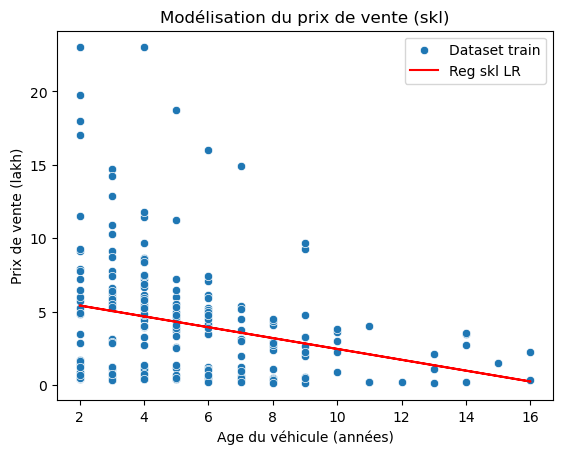

In [42]:
fit_3 = model_3.predict(X_train_r)

sns.scatterplot(data=car_data, x=X_train, y=Y_train, label='Dataset train')
plt.plot(X_train, fit_3, color='red', label='Reg skl LR')
plt.legend()

# Set title
plt.title('Modélisation du prix de vente (skl)')
# Set x-axis label
plt.xlabel('Age du véhicule (années)')
# Set y-axis label
plt.ylabel('Prix de vente (lakh)')

### Model 3 - Validation

In [43]:
Y_pred_3 = model_3.predict(X_valid.array.reshape(-1, 1))

Text(0, 0.5, 'Prix de vente (lakh)')

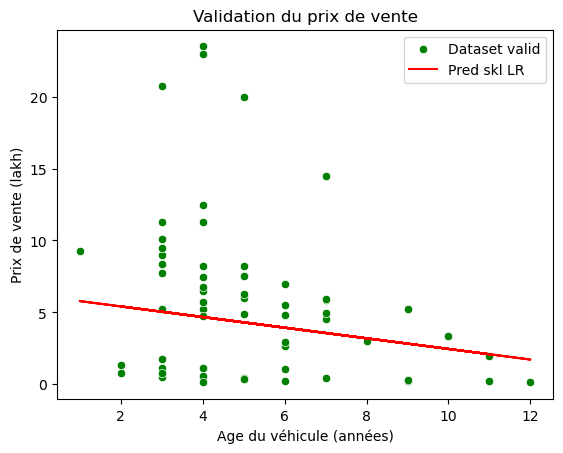

In [44]:
sns.scatterplot(data=car_data, x=X_valid, y=Y_valid, color='g', label='Dataset valid')
plt.plot(X_valid, Y_pred_3, c='r', label='Pred skl LR')
plt.legend()

# Set title
plt.title('Validation du prix de vente')
# Set x-axis label
plt.xlabel('Age du véhicule (années)')
# Set y-axis label
plt.ylabel('Prix de vente (lakh)')

In [45]:
r2_3V = r2_score(Y_valid, Y_pred_3)

print('r² Validation : ', r2_3V)
print('r² Train : ', r2_3)

r² Validation :  0.0017347437789374531
r² Train :  0.069770415078657


In [46]:
Y_pred_3 = pd.Series(Y_pred_3)

rss_3V = RSS(Y_valid, Y_pred_3)
mse_3V = MSE(Y_valid, Y_pred_3)
rmse_3V = RMSE(Y_valid, Y_pred_3)
rmsle_3V = RMSLE(Y_valid, Y_pred_3)

print('RSS', rss_3V)
print('MSE', mse_3V)
print('RMSE', rmse_3V)
print('RMLSE', rmsle_3V)

RSS 1889.7355695785614
MSE 31.495592826309355
RMSE 5.612093444189018
RMLSE 0.8377051947379184


## Model 4 => statsmodel => OLS (moindres carrés = Ordinary Least Squares)

### Model 4 - Train

In [47]:
X_train_sm = sm.add_constant(X_train)

In [48]:
lr = sm.OLS(Y_train, X_train_sm).fit()

In [49]:
lr.params

const    6.151242
Year    -0.370106
dtype: float64

In [50]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     17.63
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           3.82e-05
Time:                        13:32:41   Log-Likelihood:                -662.14
No. Observations:                 237   AIC:                             1328.
Df Residuals:                     235   BIC:                             1335.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1512      0.537     11.449      0.000       5.093       7.210
Year          -0.3701      0.088     -4.198      0.000      -0.544      -0.196
==============================================================================
Omnibus:                       94.963   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.379
Skew:                           1.718   Prob(JB):                     2.43e-68
Kurtosis:                       7.442   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Prix de vente (lakh)')

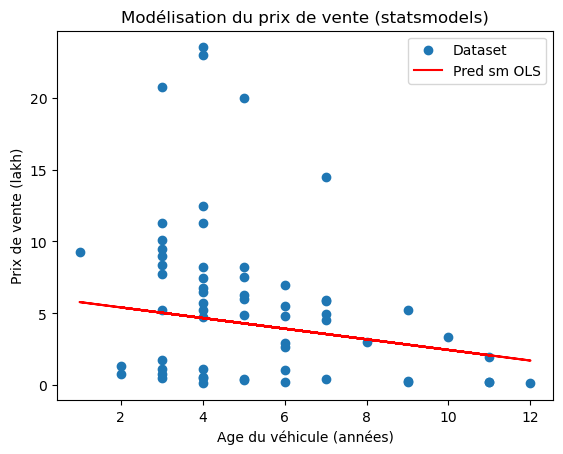

In [51]:
plt.scatter(X_valid, Y_valid, label='Dataset')
plt.plot(X_valid, lr.params.const + lr.params.Year * X_valid, c='red', label='Pred sm OLS')
plt.legend()

# Set title
plt.title('Modélisation du prix de vente (statsmodels)')
# Set x-axis label
plt.xlabel('Age du véhicule (années)')
# Set y-axis label
plt.ylabel('Prix de vente (lakh)')

## Comparaison des modèles univariés

In [52]:
print('Value', '      scipy', '               numpy', '               sklearn')
print('a : ', slope_1, slope_2, slope_3)
print('b : ', intercept_1, intercept_2, intercept_3)

print()

print('r2 Train : ', r2_1, r2_2, r2_3)
print('r2 Valid : ', r2_1V, r2_2V, r2_3V)

Value       scipy                numpy                sklearn
a :  -0.37010610741296657 -0.37010610741296734 -0.3701061074129665
b :  6.151242354819531 6.1512423548195345 6.151242354819531

r2 Train :  0.06977041507865692 0.06977041507865694 0.069770415078657
r2 Valid :  0.0017347437789374531 0.09678949113614978 0.0017347437789374531


## Multivariate model (sklearn)

### Train and test dataset creation

In [53]:
transmission_enc = pd.DataFrame(LabelEncoder().fit_transform(car_data['Transmission']))
car_data.drop(['Transmission'], axis = 1)
car_data['Transmission'] = transmission_enc
car_data['Age'] = car_data.Year.max() + 1 - car_data.Year

In [54]:
X_M = car_data[['Age', 'Kms_Driven','Transmission']]

In [55]:
X_M

,Age,Kms_Driven,Transmission
0,5,27000,1
1,6,43000,1
2,2,6900,1
3,8,5200,1
4,5,42450,1
...,...,...,...
292,3,33988,1
293,4,60000,1
294,10,87934,1
295,2,9000,1


Text(0.5, 1.0, 'Matrice de corrélation')

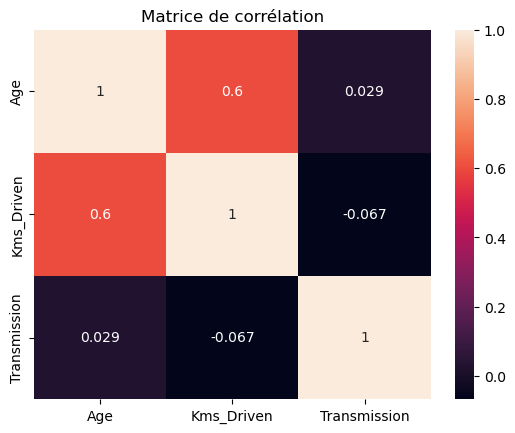

In [56]:
sns.heatmap(X_M.corr(), annot = True)
plt.title('Matrice de corrélation')

In [57]:
X_train_M, X_valid_M, y_train_M, y_valid_M = train_test_split(X_M, Y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [58]:
X_train_M_v = X_train_M.values
y_train_M_v = y_train_M.values

### Multivariate model - Train

In [59]:
model_multi = LinearRegression()
model_multi.fit(X_train_M_v, y_train_M_v)

LinearRegression()

In [60]:
fit_multi = model_multi.predict(X_train_M_v)

In [61]:
#précision du modèle
r2_M = model_multi.score(X_train_M_v, y_train_M_v)
print('r² : ', r2_M)

intercept_M = model_multi.intercept_
print('Intercept (b) : ', intercept_M)
slope_M = model_multi.coef_
print('Slope (a) : ', slope_M)

r² :  0.28347224963211337
Intercept (b) :  9.275061574626708
Slope (a) :  [-7.29562992e-01  6.55679355e-05 -3.85649441e+00]


### Multivariate model - Validation

In [62]:
Y_pred_M = model_multi.predict(X_valid_M.values)

In [63]:
r2_MV = r2_score(y_valid_M, Y_pred_M)

print('r² Validation : ', r2_MV)
print('r² Train : ', r2_M)

Y_pred_M = pd.Series(Y_pred_M)

rss_MV = RSS(Y_valid, Y_pred_M)
mse_MV = MSE(Y_valid, Y_pred_M)
rmse_MV = RMSE(Y_valid, Y_pred_M)
rmsle_MV = RMSLE(Y_valid, Y_pred_M)

print('RSS', rss_MV)
print('MSE', mse_MV)
print('RMSE', rmse_MV)
print('RMLSE', rmsle_MV)

r² Validation :  0.28001539149115284
r² Train :  0.28347224963211337
RSS 1362.9448844075241
MSE 22.715748073458734
RMSE 4.7661040770695235
RMLSE 0.8235021356986981


## Conclusion

Meilleur résultat avec le modèle multivarié

## Custom Model

### Definitions

In [64]:
def dist(P, Q):
    return (P - Q)**2

In [65]:
class RL():
    def __init__(self):       
        self.X = []
        self.Y = []
        self.Y_pred = []
        
        self.a = 0
        self.b = 0
        self.error = 0
        self.r = 0
        self.desc = []
    
    def error_eval(self, a, b):
        N = len(self.X)
        err = 0

        for i in range(N):

            y_pred = a * self.X[i] + b
            err = err + dist(self.Y[i], y_pred)
            
            self.error = err

        return err
        
    
    def fit_init(self, X, Y):  
        self.X = X
        self.Y = Y
             
        for i in range(len(self.Y)):
            if self.Y[i] == max(self.Y):
                i_max = i

        #print(i_max, i_min, i_moy)
                                                         
        for i in range(len(self.Y)):
            if self.X[i] == max(self.X):
                
                i_min = i
                                                 
        #print('i_min : ', i_min)
        
        i_moy = int(len(self.X) / 2)
        
        #print('i_moy : ', i_moy)
        
        #print(self.X[i_min], self.Y[i_min])
        
        #print(self.X[i_max], self.Y[i_max])
        
        #print(self.X[i_moy], self.Y[i_moy])
        
        a0 = (self.Y[i_max] - self.Y[i_min]) / (self.X[i_max] - self.X[i_min])
        b0 = self.Y[i_min] - a0 * self.X[i_min]
        
        self.desc.append([(a0, b0)])
        
        err = self.error_eval(a0, b0)
        self.desc[-1].append(err)
        
        self.a = a0
        self.b = b0
        
        plt.plot(X, self.b +  self.a * X, c='yellow', label='Pred perso 0')
        
        #print('a0 : ', a0)
        #print('b0 : ', b0)
           
    
    def grad_calc(self, a, b):
    
        N = len(self.X)
        dEda = 0
        dEdb = 0

        for i in range(N):
            x = self.X[i]
            y = self.Y[i]
            U = - 2 * x * (y - (a * x + b))
            V = - 2 * (y - (a * x + b))

            dEda = dEda + U
            dEdb = dEdb + V
        
        #print(dEda, dEdb)
        
        self.desc[-1].append((dEda, dEdb))
        
        return (dEda, dEdb)
        
        
    def fit(self, X, Y):
    
        delta = 0.0001
        
        #print(self.desc)
        
        delta_err = self.error
        i = 0
        
        while delta_err > 1:
            
            i = i + 1
            a = self.desc[i - 1][0][0]
            b = self.desc[i - 1][0][1]
            
            #print(a, b)
            
                      
            gradE = self.grad_calc(a, b)
            
            ap = a - delta * gradE[0]
            bp = b - delta * gradE[1]
            
            self.desc.append([(ap, bp)])
            
            err0 = self.desc[-2][1]
            
            err = self.error_eval(ap, bp)
            self.desc[-1].append(err)
            
            delta_err = err0 - err
            
            #print(i, self.desc)
            
            self.a = ap
            self.b = bp
            self.error = err
            plt.plot(X, self.b +  self.a * X, c='orange')
            
        plt.plot(X, self.b +  self.a * X, c='red', label='Pred perso final')
        plt.ylim((0,25))
        
        
    def predict(self):
        self.Y_pred = self.b + self.a * self.X

### Custom Model - Train

In [66]:
model_perso = RL()

In [67]:
X = X_train.to_numpy()
Y = Y_train.to_numpy()

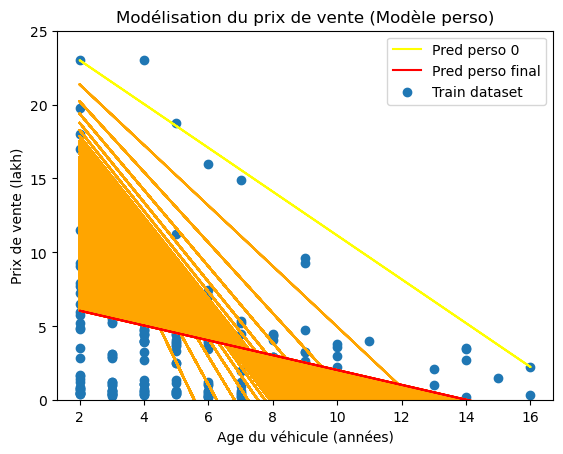

In [68]:
#plt.scatter(X, Y, label='Train dataset')
#plt.plot(X, model_perso.b +  model_perso.a * X, c='red', label='Pred perso')


# Set title
plt.title('Modélisation du prix de vente (Modèle perso)')
# Set x-axis label
plt.xlabel('Age du véhicule (années)')
# Set y-axis label
plt.ylabel('Prix de vente (lakh)')
model_perso.fit_init(X, Y)

model_perso.fit(X, Y)
#df2 = pd.DataFrame(model_perso.desc, columns = ['(a, b)','err', 'grad'])
#print(df2)
plt.scatter(X, Y, label='Train dataset')
plt.legend()

In [69]:
print('Slope : ', model_perso.a)
print('Intercept : ', model_perso.b)

Slope :  -0.5019460615905941
Intercept :  7.061684402365169


In [70]:
model_perso.predict()
fit_P = model_perso.Y_pred

In [71]:
r2_P = r2_score(Y_train, fit_P)

print('r² : ', r2_P)

r² :  0.05840212092002817


### Custom Model - Validation 

In [72]:
Y_pred_P = predict(X_valid, model_perso.a, model_perso.b)

## Performance du modèle personnalisé

In [73]:
r2_PV = r2_score(Y_valid, Y_pred_P)

print('r² : ', r2_P)

r² :  0.05840212092002817


In [74]:
print('r² Validation : ', r2_PV)
print('r² Train : ', r2_P)

#Y_pred_M = pd.Series(Y_pred_P)

rss_PV = RSS(Y_valid, Y_pred_P)
mse_PV = MSE(Y_valid, Y_pred_P)
rmse_PV = RMSE(Y_valid, Y_pred_P)
rmsle_PV = RMSLE(Y_valid, Y_pred_P)

print('RSS', rss_PV)
print('MSE', mse_PV)
print('RMSE', rmse_PV)
print('RMLSE', rmsle_PV)

r² Validation :  0.0350767632362875
r² Train :  0.05840212092002817
RSS 1826.6184774655385
MSE 30.44364129109231
RMSE 5.517575671532952
RMLSE 0.830258040695013


## Quel prix pour un véhicule de moins de 7 ans, moins de 100 000 km avec boîte manuelle ?

In [75]:
# Avec tout le dataset
P = 11.387503618770225 + 7 * -5.38542399e-01 + 100000 * 1.74728571e-05 + 1 * -5.16506926e+00
P

4.199923275770225

In [76]:
# Avec le dataset amputé des observations isolées
P = intercept_M + 7 * slope_M[0] + 100000 * slope_M[1] + 1 * slope_M[2]
P

6.868419764431367